In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [0]:

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

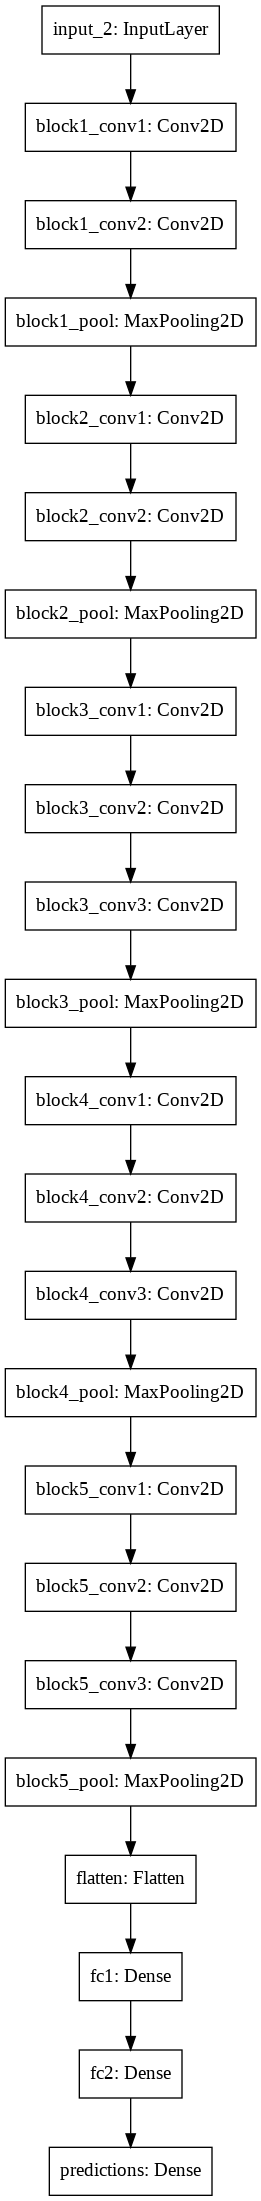

In [0]:
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')

In [0]:
import os
import urllib.request
urllib.request.urlretrieve('https://ep01.epimg.net/elpais/imagenes/2019/09/05/portada/1567718396_142545_1567718442_portada_normal.jpg', 'google.jpg')


('google.jpg', <http.client.HTTPMessage at 0x7f55114f87b8>)

In [0]:
def image_ready():
  from keras.preprocessing.image import load_img
# load an image from file
  image = load_img('google.jpg', target_size=(224, 224))
  from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
  image = img_to_array(image)
# reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
  image = preprocess_input(image)
  return image

In [0]:
	
# predict the probability across all output classes
yhat = model.predict(image_ready())

In [0]:

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
labe = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = labe[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
soccer_ball (91.78%)


In [0]:
#type(labe)
labe

[[('n04254680', 'soccer_ball', 0.9178202),
  ('n04118538', 'rugby_ball', 0.05132878),
  ('n02799071', 'baseball', 0.012018286),
  ('n09835506', 'ballplayer', 0.006159615),
  ('n04509417', 'unicycle', 0.002957406)]]